<a href="https://colab.research.google.com/github/OscarFelipeDelgado/Development/blob/main/KNN_Delgado%2C_Aroca%2C_Sanchez%2C_Bohorques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def aprendizaje(self,X,C):
        self.X=X # matriz de vectores de caracteristicas
        self.c=C # clases asociadas a cada vector x(n)
        self.n_muestras=X.shape[1] # cantidad de muestras

    def clasificacion(self,Y):
        clases=[]
        for i in range(Y.shape[1]): # por cada vector y(n) a clasificar
            distancias=np.empty(self.n_muestras)
            for n in range(self.n_muestras): # por cada vector x(n) de caracteristicas
                distancias[n]=EUCLIDIANA(self.X[:,n],Y[:,i])

            # distancias mas cercanas
            k_distancias=np.argsort(distancias)
            # identificar las k distancias - clases
            k_etiqueta=self.c[k_distancias[:self.k]]
            print(k_etiqueta)
            # votacion
            c = Counter(k_etiqueta).most_common(1)#(5,0)
            clases.append(c[0][0]) # almacenamos la clase asignada al vector y(n)
        return clases


def EUCLIDIANA(x,y):
    return np.sqrt(np.sum((x-y)**2))

[1 1 0 0 0 0 1 1 0 0 0 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
clases de los puntos y(n):  [0, 1, 0]


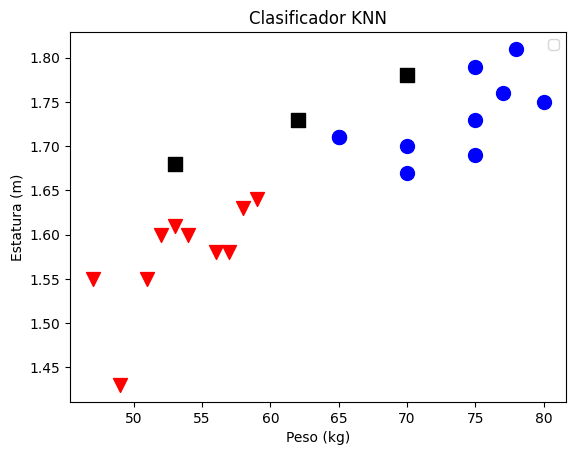

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from knn import KNN

# x(n)--< Peso kg,Est. mtrs >---
x1=np.array([[49],[1.43]]) # ninos
x2=np.array([[51],[1.55]])
x3=np.array([[57],[1.58]])
x4=np.array([[47],[1.55]])
x5=np.array([[54],[1.60]])
x6=np.array([[56],[1.58]])
x7=np.array([[59],[1.64]])
x8=np.array([[53],[1.61]])
x9=np.array([[58],[1.63]])
x10=np.array([[52],[1.60]]) # adultos
x11=np.array([[75],[1.73]])
x12=np.array([[80],[1.75]])
x13=np.array([[75],[1.69]])
x14=np.array([[65],[1.71]])
x15=np.array([[75],[1.79]])
x16=np.array([[77],[1.76]])
x17=np.array([[65],[1.71]])
x18=np.array([[70],[1.70]])
x19=np.array([[78],[1.81]])
x20=np.array([[70],[1.67]])

c0=np.zeros(10)
c1=np.ones(10)

X=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20),axis=1)
C=np.concatenate((c0,c1),axis=0)
C=np.uint8(C)

# nuevos datos a clasificar con KNN
y1=np.array([[62],[1.73]])
y2=np.array([[70],[1.78]])
y3=np.array([[53],[1.68]])
Y=np.concatenate((y1,y2,y3),axis=1)

for i in range(X.shape[1]):
    if C[i]==0:
        marcar='v'
        color='red'
    else:
        marcar='o'
        color='blue'
    plt.scatter(x=X[0,i],y=X[1,i],c=color,s=100,marker=marcar)

for j in range(Y.shape[1]):
    plt.scatter(x=Y[0,j],y=Y[1,j],c='black',s=100,marker='s')

plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (m)')
plt.title('Clasificador KNN')
plt.legend()

# iniciar KNN
clasificador = KNN(k=15)
clasificador.aprendizaje(X,C) # fase de aprendizaje
clasificar = clasificador.clasificacion(Y)
print('clases de los puntos y(n): ',clasificar)